In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [5]:
n = 1000
ni = 5
b0 = 5
b1 = 2
x = np.linspace(0,10,1000)

In [16]:
def prosta_regresji(x,y):
    b_1 = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b_0 = np.mean(y) - b_1 * np.mean(x)
    return b_0, b_1

In [7]:
bledy = stats.t.rvs(ni, loc=0, scale=1, size=n)

In [8]:
y = b0 + b1 * x + bledy
b0_e, b1_e = prosta_regresji(x, y)

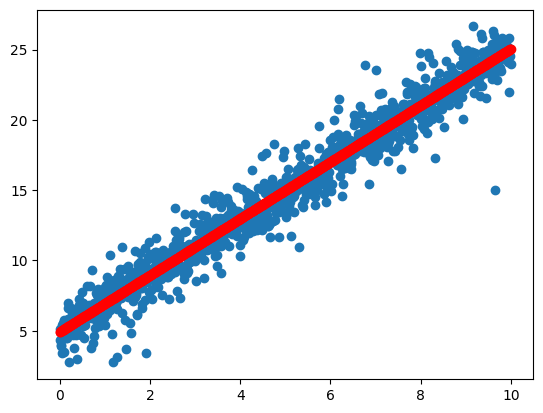

In [9]:
plt.scatter(x,y)
plt.scatter(x, b1_e * x + b0_e, color="r")
plt.show()

In [17]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

In [18]:
def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [12]:
print(b1_estim(x,y), b0_estim(x,y))

2.0141041410457223 4.921245336192918


In [13]:
mc = 5000
def estymacja_mc(mc, n, ni, b0, b1):
    bledy = [stats.t.rvs(ni, loc=0, scale=1, size=n) for i in range(mc)]
    ys = [b0 + b1 * x + blad for blad in bledy]
    b0_e, b1_e = [b0_estim(x,y_) for y_ in ys], [b1_estim(x,y_) for y_ in ys]
    b0_mean, b1_mean = np.mean(b0_e), np.mean(b1_e)
    b0_var = np.var(b0_e)
    b1_var = np.var(b1_e)
    return b0_mean, b1_mean, b0_var, b1_var

In [14]:
b0_e, b1_e = estymacja_mc(mc, n, ni, b0, b1)

ValueError: too many values to unpack (expected 2)

In [15]:
mc = 5000
nis = np.linspace(10,100,18)
def estymacja_mc_ni(mc, n, nis, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for nis_ in nis:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            blad = stats.t.rvs(nis_, loc=0, scale=1, size=n)
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append(((1/n)+((np.mean(x)**2)/np.sum((x-np.mean(x))**2)))*(nis_/(nis_-2)))
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(nis_/(nis_-2)))
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var = [np.var(b0_) for b0_ in b0s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var

In [16]:
b0_mean, b1_mean, b0_var, b1_var,b0s_teo_var, b1s_teo_var = estymacja_mc_ni(mc, n, nis, b0, b1)

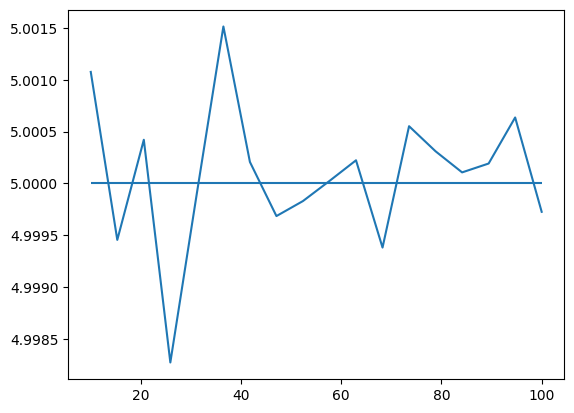

In [17]:
plt.plot(nis, b0_mean)
plt.hlines(b0,10,100)
plt.show()

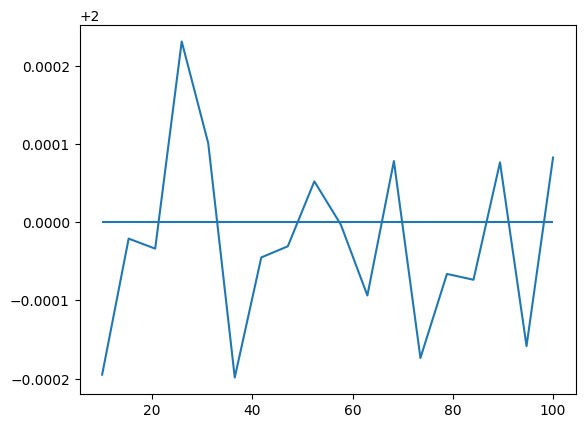

In [18]:
plt.plot(nis, b1_mean)
plt.hlines(b1, 10,100)
plt.show()

[]

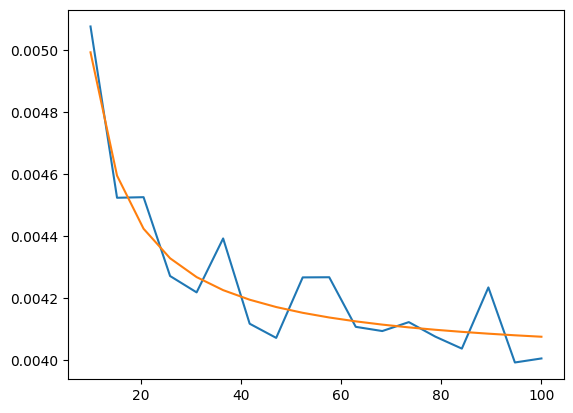

In [19]:
plt.plot(nis, b0_var)
plt.plot(nis, b0s_teo_var)
plt.plot()

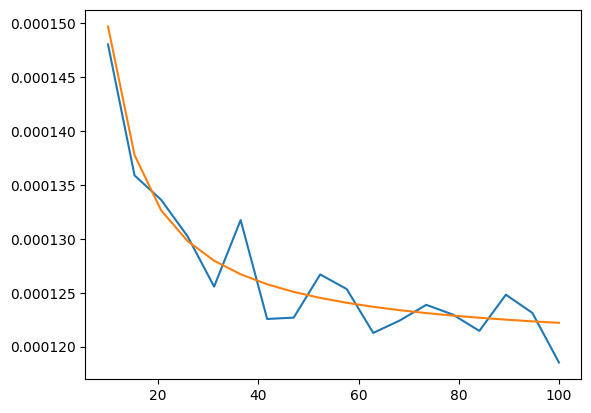

In [20]:
plt.plot(nis, b1_var)
plt.plot(nis, b1s_teo_var)
plt.show()

In [21]:
mc = 5000
ns = np.linspace(100,1000,18)
def estymacja_mc_n(mc, ns, ni, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for n in ns:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            x = np.linspace(0,10,int(n))
            blad = stats.t.rvs(ni, loc=0, scale=1, size=int(n))
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append((1/n + np.mean(x)**2/np.sum((x-np.mean(x))**2))*(ni/(ni-2)))
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(ni/(ni-2)))
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var = [np.var(b0_) for b0_ in b0s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var

In [22]:
b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var = estymacja_mc_n(mc, ns, ni, b0, b1)

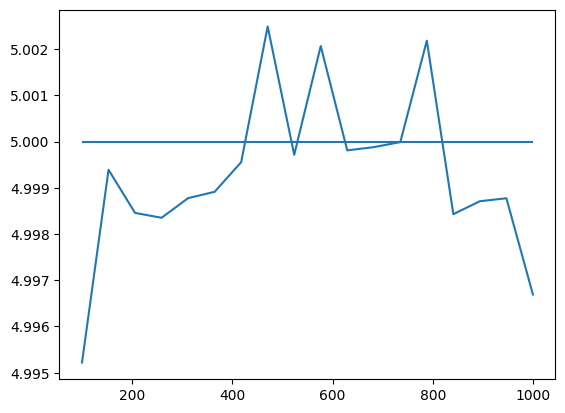

In [23]:
plt.plot(ns, b0_mean)
plt.hlines(b0, 100,1000)
plt.show()

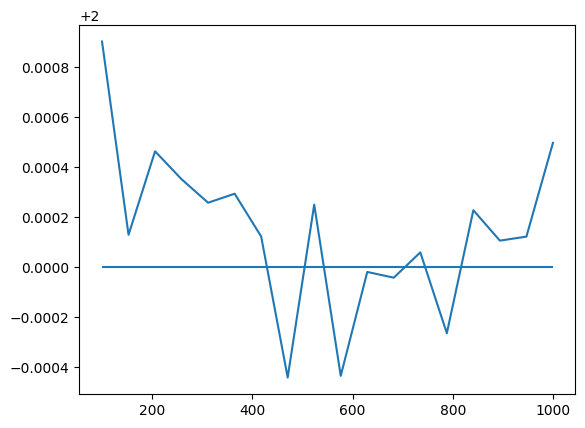

In [24]:
plt.plot(ns, b1_mean)
plt.hlines(b1, 100,1000)
plt.show()

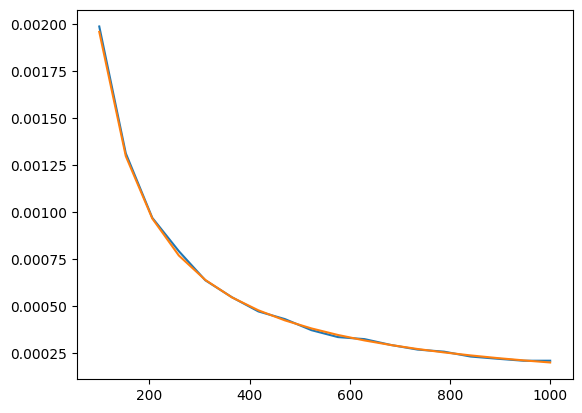

In [25]:
plt.plot(ns, b1_var)
plt.plot(ns, b1s_teo_var)
plt.show()

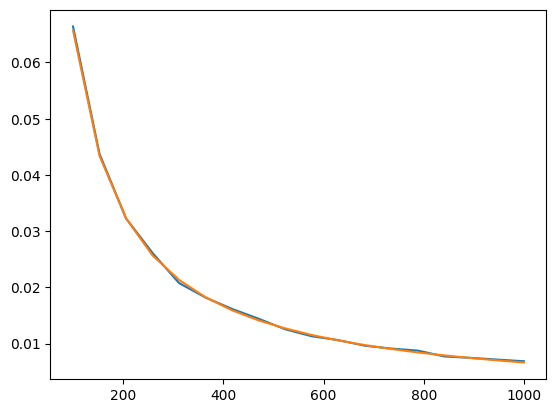

In [26]:
plt.plot(ns, b0_var)
plt.plot(ns, b0s_teo_var)
plt.show()

In [27]:
mc = 5000
sigmas = np.linspace(1,50,50)
def estymacja_mc_normal_sigma(mc, n, sigmas, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for sigma in sigmas:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            blad = np.random.normal(0,sigma, n)
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append(((1/n)+((np.mean(x)**2)/np.sum((x-np.mean(x))**2)))*(sigma**2))
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(sigma**2))
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var = [np.var(b0_) for b0_ in b0s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var

In [28]:
b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var = estymacja_mc_normal_sigma(mc, n, sigmas, b0, b1)

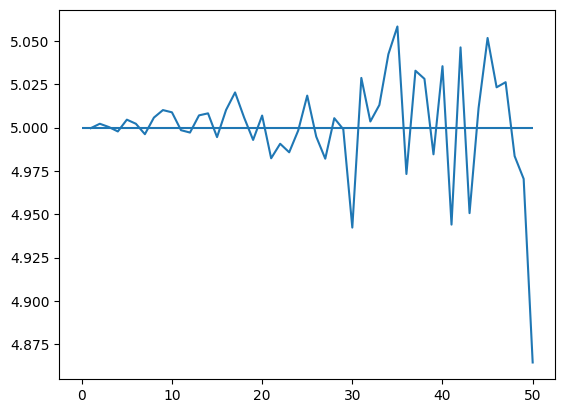

In [29]:
plt.plot(sigmas, b0_mean)
plt.hlines(b0, 0,50)
plt.show()

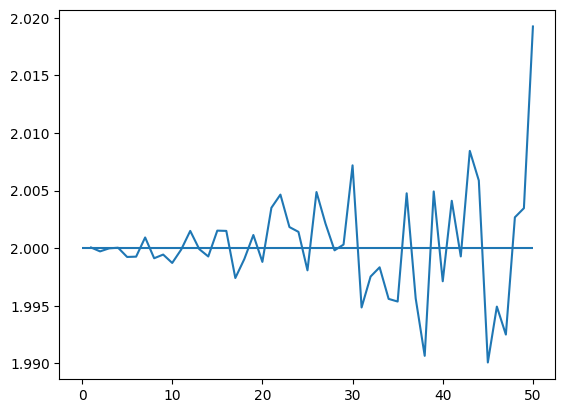

In [30]:
plt.plot(sigmas, b1_mean)
plt.hlines(b1, 0,50)
plt.show()

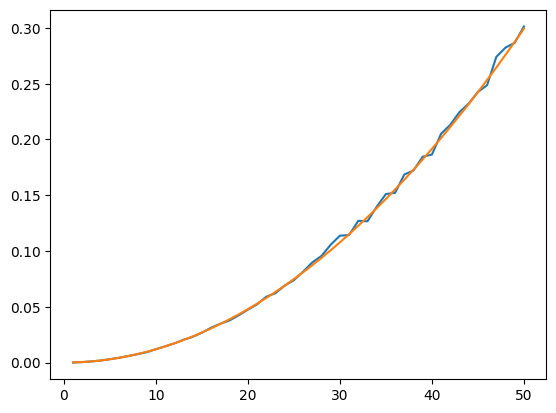

In [31]:
plt.plot(sigmas, b1_var)
plt.plot(sigmas, b1s_teo_var)
plt.show()

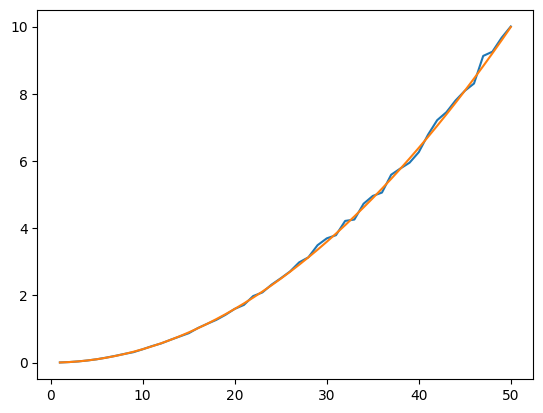

In [32]:
plt.plot(sigmas, b0_var)
plt.plot(sigmas, b0s_teo_var)
plt.show()

In [33]:
mc = 5000
sigma = 5
ns = np.linspace(100,1000,18)
def estymacja_mc_normal_n(mc, ns, sigma, b0, b1):
    b0s, b1s = [], []
    b0s_teo_var, b1s_teo_var = [], []
    for n in ns:
        b0_mc, b1_mc = [], []
        for i in range(mc):
            x = np.linspace(0,10,int(n))
            blad = np.random.normal(0,sigma,int(n))
            ys = b0 + b1*x + blad
            b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
            b0_mc.append(b0_e)
            b1_mc.append(b1_e)
        b0s_teo_var.append((1/n + np.mean(x)**2/np.sum((x-np.mean(x))**2))*(sigma**2))
        b1s_teo_var.append((1/np.sum((x-np.mean(x))**2))*(sigma**2))
        b0s.append(b0_mc)
        b1s.append(b1_mc)
    b0_mean = [np.mean(b0_) for b0_ in b0s]
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b0_var = [np.var(b0_) for b0_ in b0s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var

In [34]:
b0_mean, b1_mean, b0_var, b1_var, b0s_teo_var, b1s_teo_var = estymacja_mc_normal_n(mc, ns, sigma, b0, b1)

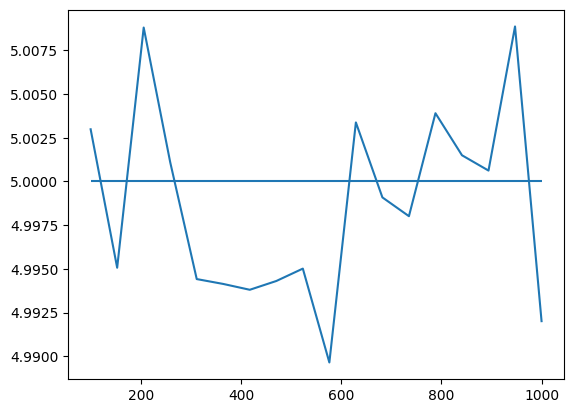

In [35]:
plt.plot(ns, b0_mean)
plt.hlines(b0, 100, 1000)
plt.show()

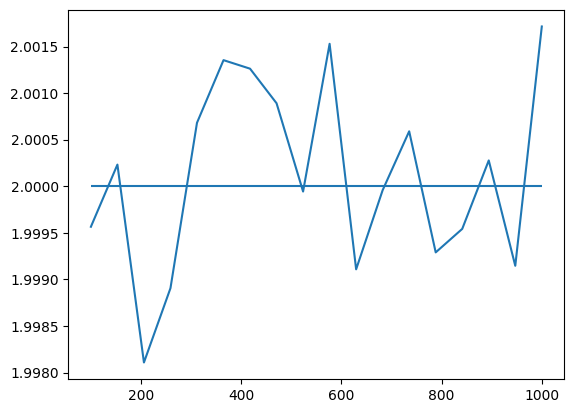

In [36]:
plt.plot(ns, b1_mean)
plt.hlines(b1, 100, 1000)
plt.show()

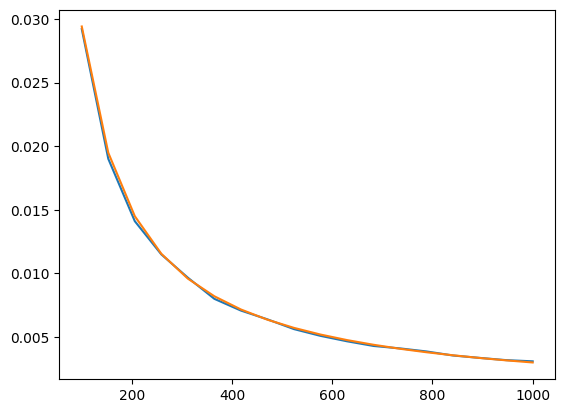

In [37]:
plt.plot(ns, b1_var)
plt.plot(ns, b1s_teo_var)
plt.show()

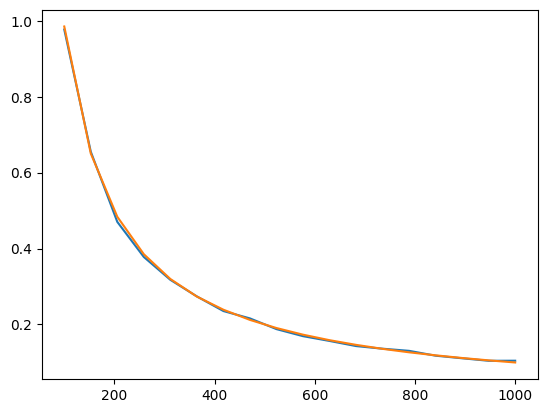

In [38]:
plt.plot(ns, b0_var)
plt.plot(ns, b0s_teo_var)
plt.show()

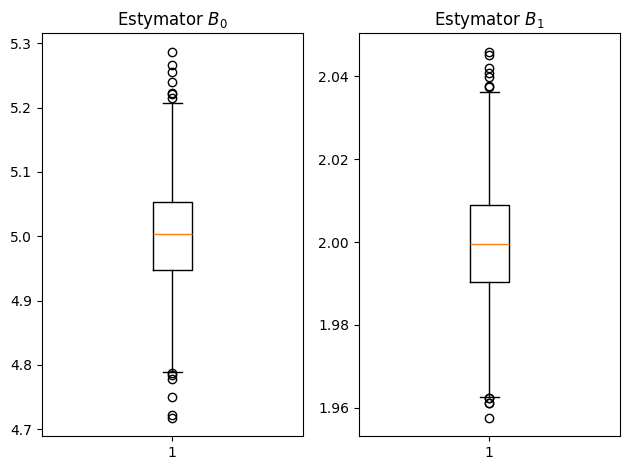

In [18]:
fig, axis = plt.subplots(1,2)

axis[0].boxplot(b0_e)
axis[0].set_title("Estymator $B_0$")

axis[1].boxplot(b1_e)
axis[1].set_title("Estymator $B_1$")
plt.tight_layout()
plt.show()

Zadanie 2

In [39]:
def beta_1(x,y):
    return np.sum(x*y)/np.sum(x**2)

In [40]:
mc = 5000
sigmas = np.linspace(1,50,50)
def estymacja_mc3_sigma(mc, n, sigmas, b1):
    b1s = []
    b1s_teo_var = []
    for sigma in sigmas:
        b1_mc = []
        for i in range(mc):
            blad = np.random.normal(0,sigma, n)
            y = b1*x + blad
            b1_e = beta_1(x,y)
            b1_mc.append(b1_e)
        b1s_teo_var.append(sigma**2/np.sum(x**2))
        b1s.append(b1_mc)
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b1_mean, b1_var, b1s_teo_var

In [41]:
b1_mean, b1_var, b1s_teo_var = estymacja_mc3_sigma(mc, n, sigmas, b1)

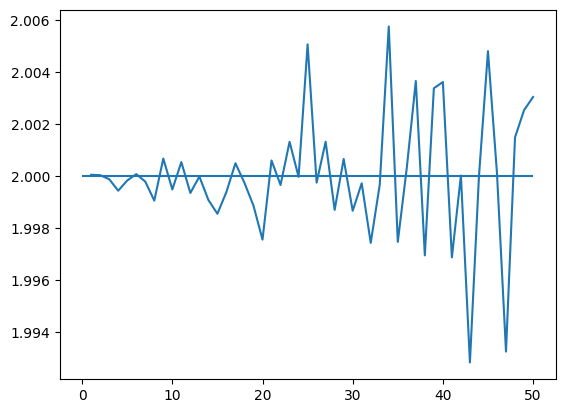

In [42]:
plt.plot(sigmas, b1_mean)
plt.hlines(b1, 0,50)
plt.show()

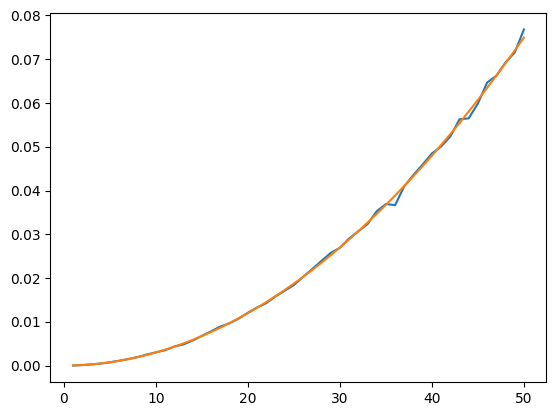

In [43]:
plt.plot(sigmas, b1_var)
plt.plot(sigmas, b1s_teo_var)
plt.show()

In [44]:
mc = 5000
sigma = 5
ns = np.linspace(100,1000,18)
def estymacja_mc3_n(mc, ns, sigma, b1):
    b1s = []
    b1s_teo_var = []
    for n in ns:
        b1_mc = []
        for i in range(mc):
            x = np.linspace(0,10,int(n))
            blad = np.random.normal(0, sigma, int(n))
            y = b1*x + blad
            b1_e = beta_1(x,y)
            b1_mc.append(b1_e)
        b1s_teo_var.append(sigma**2/np.sum(x**2))
        b1s.append(b1_mc)
    b1_mean = [np.mean(b1_) for b1_ in b1s]
    b1_var = [np.var(b1_) for b1_ in b1s]
    return b1_mean, b1_var, b1s_teo_var

In [45]:
b1_mean, b1_var, b1s_teo_var = estymacja_mc3_n(mc, ns, sigma, b1)

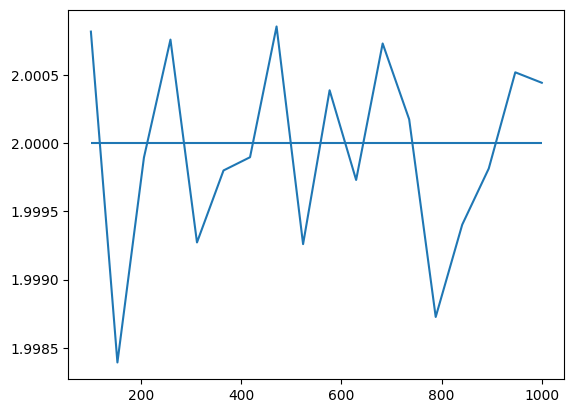

In [46]:
plt.plot(ns, b1_mean)
plt.hlines(b1, 100,1000)
plt.show()

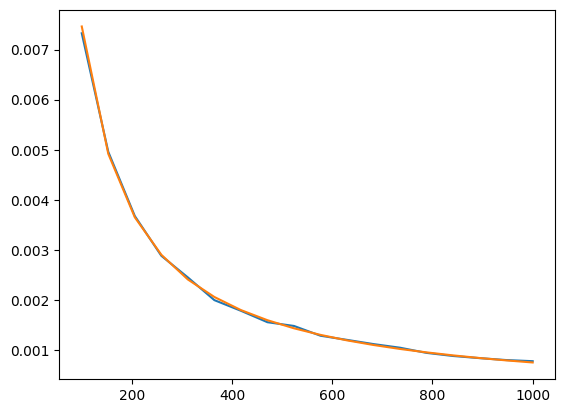

In [47]:
plt.plot(ns, b1_var)
plt.plot(ns, b1s_teo_var)
plt.show()

Zadanie 3

In [53]:
sigma3 = 2

In [54]:
b1_3, b0_3 = 5, 2

In [55]:
n3 = 1000

In [56]:
mc3 = 5000
def mc_simul(mc, n, sigma, b0, b1):
    b1_estims = []
    b0_estims = []
    for i in range(mc):
        x = np.random.normal(0,1,n)
        epsis = np.random.normal(0,sigma,n)
        y = b1* x + b0 + epsis
        b1_estims.append(b1_estim(x,y))
        b0_estims.append(b0_estim(x,y))
    return b1_estims,b0_estims

In [57]:
def mc_simul3(mc, n, sigma, b0, b1):
    b0s, b1s = [], []
    for i in range(mc):
        x = np.linspace(0,10,int(n))
        blad = np.random.normal(0,sigma,n)
        ys = b0 + b1*x + blad
        b0_e, b1_e = b0_estim(x,ys), b1_estim(x,ys)
        b0s.append(b0_e)
        b1s.append(b1_e)
    return b0s, b1s

In [58]:
b0_estims, b1_estims = mc_simul3(mc3, n3, sigma3, b0_3, b1_3)

In [74]:
import seaborn as sns

In [59]:
xs3 = np.linspace(0,10,n3)

In [81]:
b0_teo_var = ((1/n3)+((np.mean(xs3)**2)/np.sum((xs3-np.mean(xs3))**2)))*(sigma3**2)

In [82]:
b1_teo_var = (1/np.sum((xs3-np.mean(xs3))**2))*(sigma3**2)

In [83]:
b1_teo_mean = b1_3
b0_teo_mean = b0_3

In [84]:
x_dens1 = np.linspace(4.8, 5.2,1000)
x_dens0 = np.linspace(1.6, 2.4, 1000)

In [86]:
x_cdf1 = np.linspace(1.5,2.5,1000)
x_cdf2 = np.linspace(4.925, 5.1, 1000)

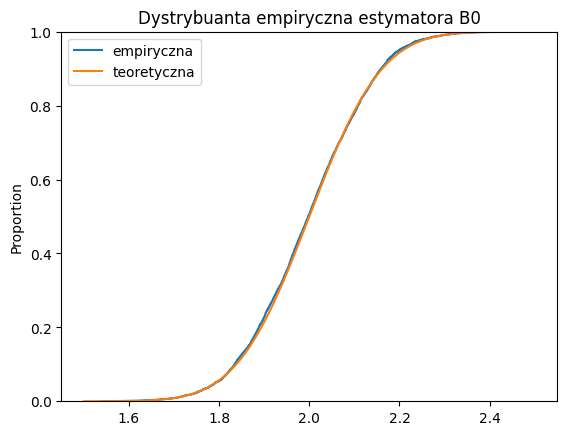

In [89]:
sns.ecdfplot(b0_estims, label = "empiryczna")
plt.plot(x_cdf1, stats.norm.cdf(x_cdf1,b0_teo_mean, np.sqrt(b0_teo_var)), label="teoretyczna")
plt.title("Dystrybuanta empiryczna estymatora B0")
plt.legend(loc="best")
plt.show()

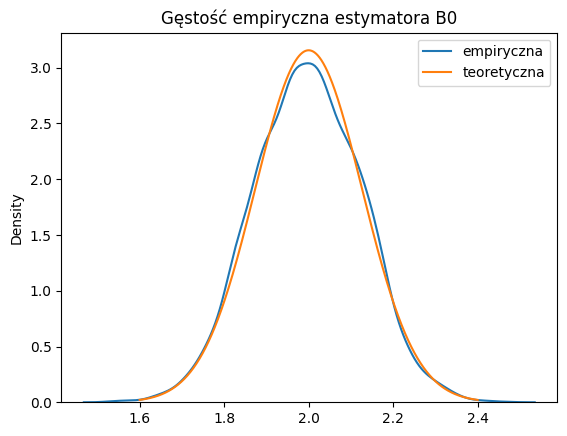

In [91]:
sns.kdeplot(b0_estims, label="empiryczna")
plt.plot(x_dens0, stats.norm.pdf(x_dens0,b0_teo_mean, np.sqrt(b0_teo_var)),label="teoretyczna")
plt.title("Gęstość empiryczna estymatora B0")
plt.legend(loc="best")
plt.show()

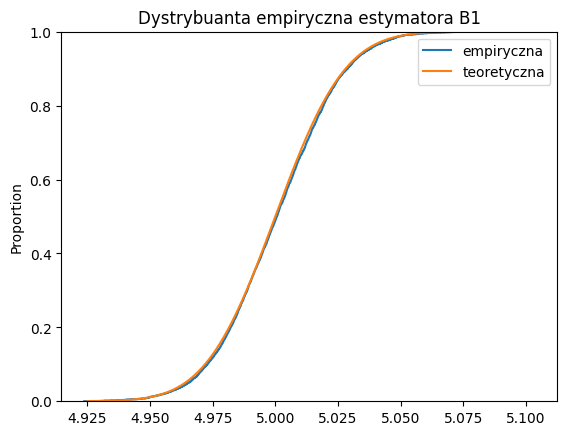

In [105]:
sns.ecdfplot(b1_estims,label="empiryczna")
plt.plot(x_cdf2, stats.norm.cdf(x_cdf2,b1_teo_mean, np.sqrt(b1_teo_var)), label="teoretyczna")
plt.title("Dystrybuanta empiryczna estymatora B1")
plt.legend(loc='best')
plt.show()

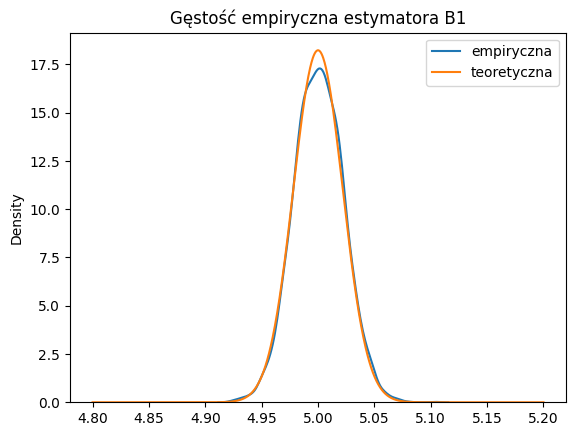

In [104]:
sns.kdeplot(b1_estims, label="empiryczna")
plt.plot(x_dens1, stats.norm.pdf(x_dens1,b1_teo_mean, np.sqrt(b1_teo_var)), label="teoretyczna")
plt.title("Gęstość empiryczna estymatora B1")
plt.legend(loc="best")
plt.show()

In [103]:
print(stats.kstest(b1_estims, np.random.normal(b1_teo_mean, np.sqrt(b1_teo_var),n3)))

KstestResult(statistic=np.float64(0.0338), pvalue=np.float64(0.2925945176688803), statistic_location=np.float64(5.015367704720482), statistic_sign=np.int8(-1))


In [102]:
print(stats.kstest(b0_estims, np.random.normal(b0_teo_mean, np.sqrt(b0_teo_var),n3)))

KstestResult(statistic=np.float64(0.035), pvalue=np.float64(0.25511197580378225), statistic_location=np.float64(1.967995435505422), statistic_sign=np.int8(1))


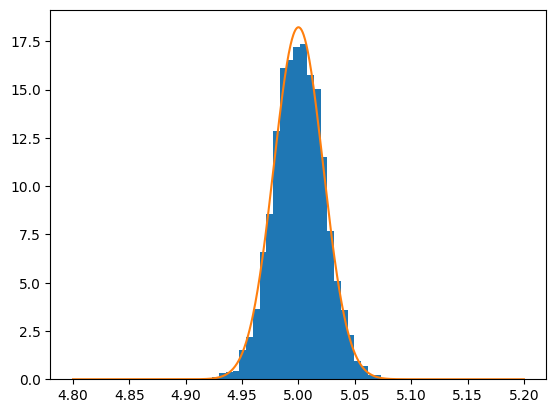

In [72]:
plt.hist(b1_estims, density=True, bins=30)
plt.plot(x_dens1, stats.norm.pdf(x_dens1,b1_teo_mean, np.sqrt(b1_teo_var)))
plt.show()

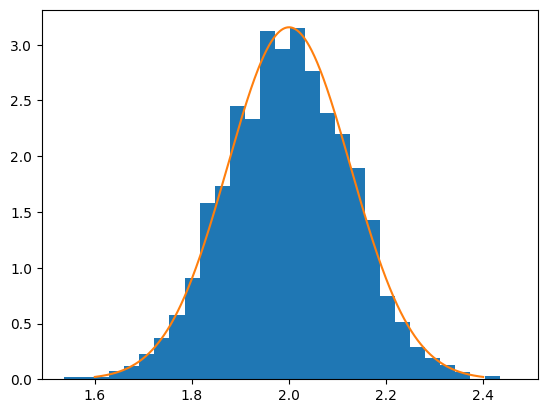

In [73]:
plt.hist(b0_estims, density=True, bins=30)
plt.plot(x_dens0, stats.norm.pdf(x_dens0,b0_teo_mean, np.sqrt(b0_teo_var)))
plt.show()

Zadanie 4

In [119]:
mc4 = 1000
def mc_simul2(mc, n, sigma, b0, b1):
    b1_estims = []
    b0_estims = []
    for i in range(mc):
        x = np.random.normal(0,1,n)
        epsis = np.random.normal(0,sigma,n)
        y = b1* x + b0 + epsis
        y_hat = b1_estim(x,y) * x + b0_estim(x,y)
        s = np.sqrt(1/(n-2) * np.sum((y-y_hat)**2))
        SE_beta_0 = s * np.sqrt((1/n + np.mean(x)**2/np.sum((x-np.mean(x))**2)))
        SE_beta_1 = s* np.sqrt(1/np.sum((x-np.mean(x))**2))
        b1_estims.append((b1_estim(x,y) - b1)/SE_beta_1)
        b0_estims.append((b0_estim(x,y) - b0)/SE_beta_0)
    return b1_estims,b0_estims

In [120]:
b1_estims, b0_estims = mc_simul2(mc4, n3, sigma3, b0_3, b1_3)

In [121]:
x_dens3 = np.linspace(-3,3,1000)

In [124]:
x_cdf1 = np.linspace(-3, 4, 1000)

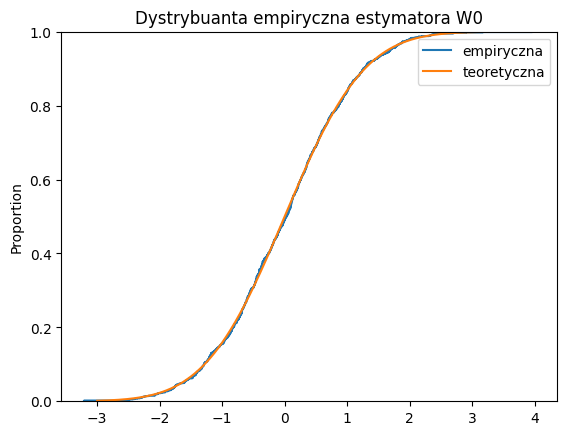

In [126]:
sns.ecdfplot(b0_estims, label = "empiryczna")
plt.plot(x_cdf1, stats.t.cdf(x_cdf1,n3-2), label="teoretyczna")
plt.title("Dystrybuanta empiryczna estymatora W0")
plt.legend(loc="best")
plt.show()

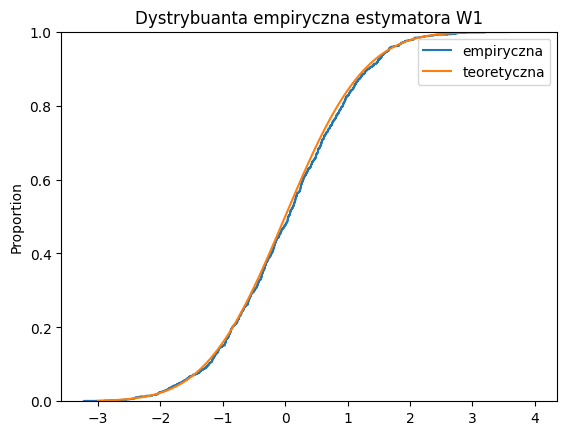

In [127]:
sns.ecdfplot(b1_estims, label = "empiryczna")
plt.plot(x_cdf1, stats.t.cdf(x_cdf1,n3-2), label="teoretyczna")
plt.title("Dystrybuanta empiryczna estymatora W1")
plt.legend(loc="best")
plt.show()

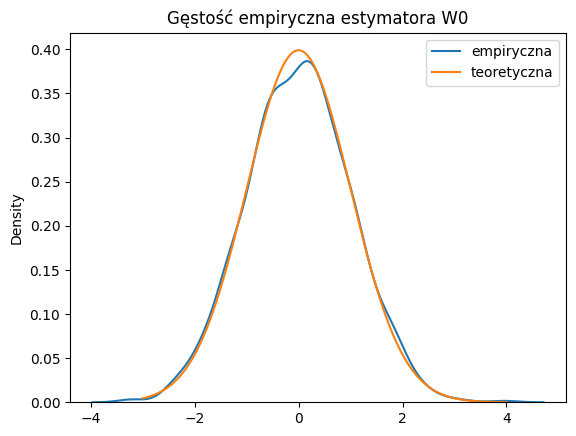

In [138]:
sns.kdeplot(b0_estims, label = "empiryczna")
plt.plot(x_cdf1, stats.t.pdf(x_cdf1,n3-2), label="teoretyczna")
plt.title("Gęstość empiryczna estymatora W0")
plt.legend(loc="best")
plt.show()

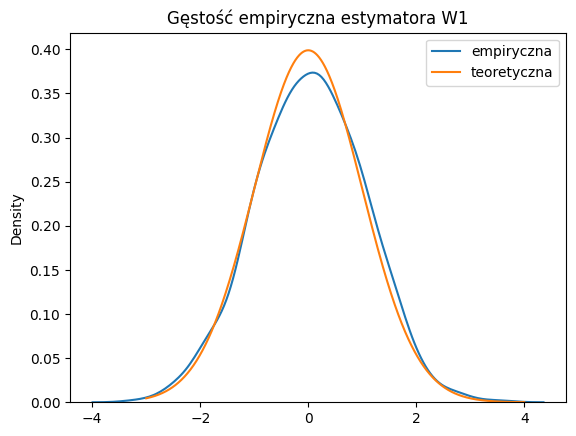

In [137]:
sns.kdeplot(b1_estims, label = "empiryczna")
plt.plot(x_cdf1, stats.t.pdf(x_cdf1,n3-2), label="teoretyczna")
plt.title("Gęstość empiryczna estymatora W1")
plt.legend(loc="best")
plt.show()

In [135]:
print(stats.kstest(b0_estims, stats.t.rvs(n3-2, size = n3)))

KstestResult(statistic=np.float64(0.022), pvalue=np.float64(0.9690010280430694), statistic_location=np.float64(-0.40048195449334545), statistic_sign=np.int8(1))


In [136]:
print(stats.kstest(b1_estims, stats.t.rvs(n3-2, size = n3)))

KstestResult(statistic=np.float64(0.037), pvalue=np.float64(0.5005673707894058), statistic_location=np.float64(0.7044352632122715), statistic_sign=np.int8(-1))


Zadanie 5

In [53]:
sigma1 = 1
sigma2 = 5

In [54]:
x1 = np.random.normal(0,np.sqrt(sigma1),400)
x2 = np.random.normal(0,np.sqrt(sigma2),600)

In [55]:
x = np.concatenate((x1,x2))
xs = np.linspace(1,1000,1000).astype(int)

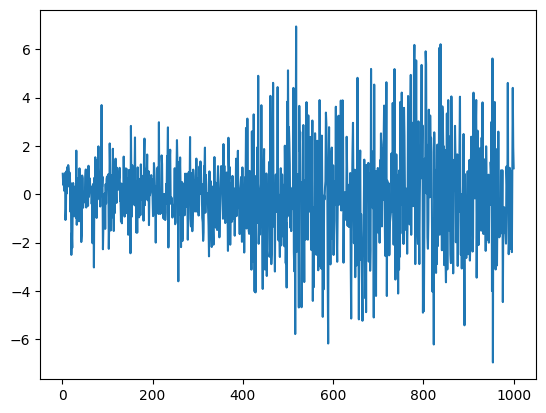

In [56]:
plt.plot(xs, x)
plt.show()

In [57]:
c = np.cumsum(x**2)

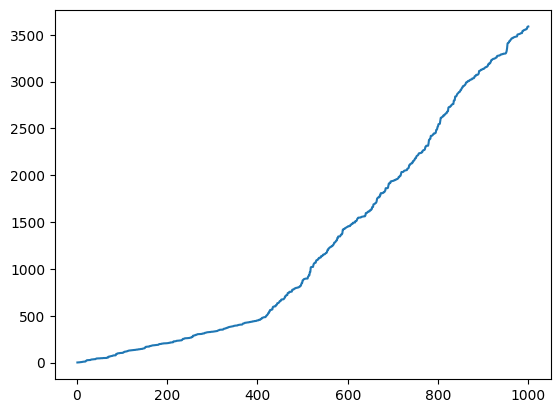

In [58]:
plt.plot(xs, c)
plt.show()

In [59]:
k = 300

In [60]:
c1, c2 = c[:k], c[k:]

In [61]:
b0_1, b1_1 = prosta_regresji(xs[:k], c1)
b0_2, b1_2 = prosta_regresji(xs[k:], c2)

In [62]:
y1 = lambda k: b1_1 * xs[:k] + b0_1
y2 = lambda k: b1_2 * xs[k:] + b0_2

In [63]:
func = lambda k: np.sum((c[:k] - y1(k)) ** 2) + np.sum((c[k:] - y2(k)) ** 2)

In [64]:
f_values = [func(x) for x in xs]

In [65]:
print(np.argmin(f_values))

424


In [66]:
def estimate_change_point(c):
    n = len(c)
    best_k = None
    min_sum_squares = np.inf
    
    for k in range(1, n - 1):

        y1 = b1_1 * xs[:k] + b0_1
        y2 = b1_2 * xs[k:] + b0_2
        
        sum_squares = np.sum((c[:k] - y1) ** 2) + np.sum((c[k:] - y2) ** 2)
        
        if sum_squares < min_sum_squares:
            min_sum_squares = sum_squares
            best_k = k
            
    return best_k

In [67]:
l = estimate_change_point(c)

In [68]:
print(l)

425
